In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [9]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [13]:
India_df_ind6 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) & \
                               (indicator_data['CountryCode'] == 'IN')]

In [14]:
India_df_ind6.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [16]:
ts = India_df_ind6['Value'] 
ts1 = India_df_ind6[['Value']].copy() 
ts1['Value']=ts1['Value']+20
ts1.head()

,Value
Year,
2016-01-01,27.107034
2015-01-01,28.010053
2014-01-01,27.505220
2013-01-01,26.386106
2012-01-01,25.456388


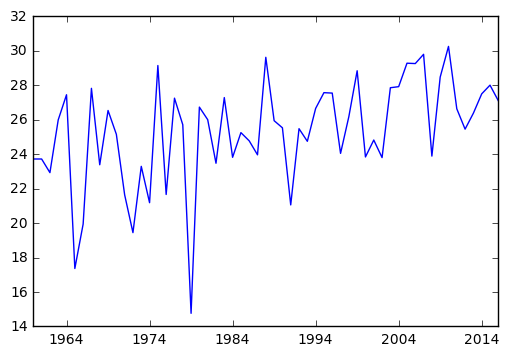

In [17]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


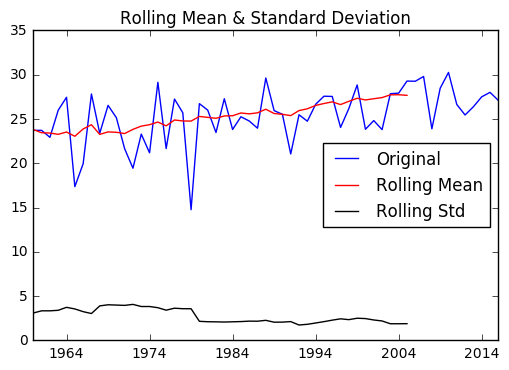

Results of Dickey-Fuller Test:
Test Statistic                 -1.121589
p-value                         0.706386
#Lags Used                     10.000000
Number of Observations Used    46.000000
Critical Value (10%)           -2.601541
Critical Value (5%)            -2.926785
Critical Value (1%)            -3.581258
dtype: float64


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

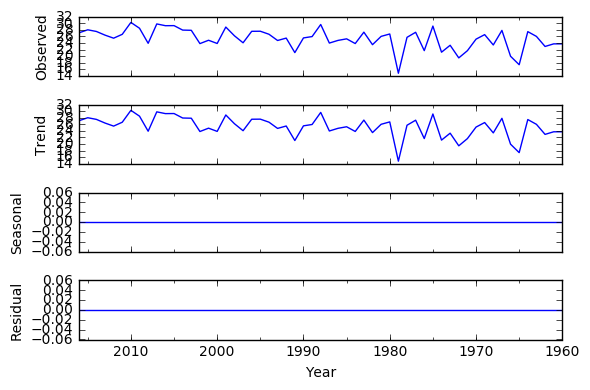

In [19]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [20]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

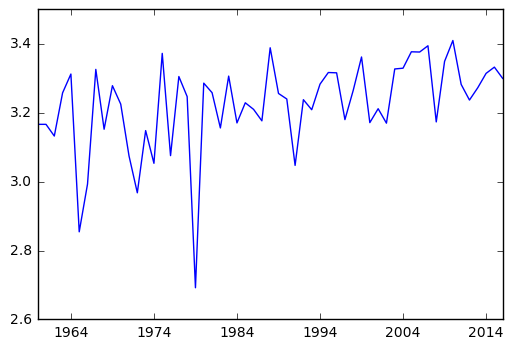

In [21]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


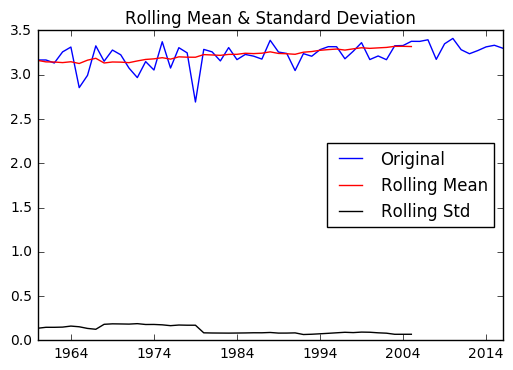

Results of Dickey-Fuller Test:
Test Statistic                 -0.915321
p-value                         0.782885
#Lags Used                      7.000000
Number of Observations Used    49.000000
Critical Value (10%)           -2.599336
Critical Value (5%)            -2.922629
Critical Value (1%)            -3.571472
dtype: float64


In [22]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [23]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


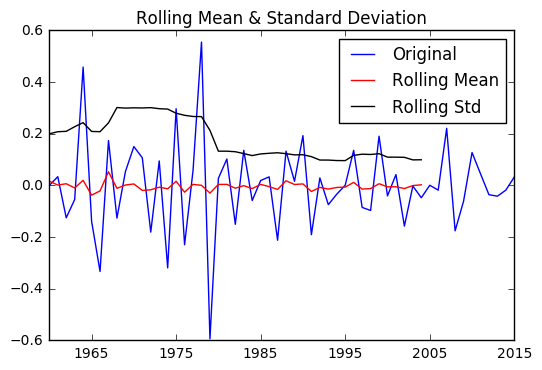

Results of Dickey-Fuller Test:
Test Statistic                -6.330380e+00
p-value                        2.916233e-08
#Lags Used                     6.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (10%)          -2.599336e+00
Critical Value (5%)           -2.922629e+00
Critical Value (1%)           -3.571472e+00
dtype: float64


In [24]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [25]:
def firstDifference(df):
    #ts_first_diff = df - df.shift()
    #ts_first_diff.dropna(inplace=True)
    ts_first_diff = df.diff()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff



C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


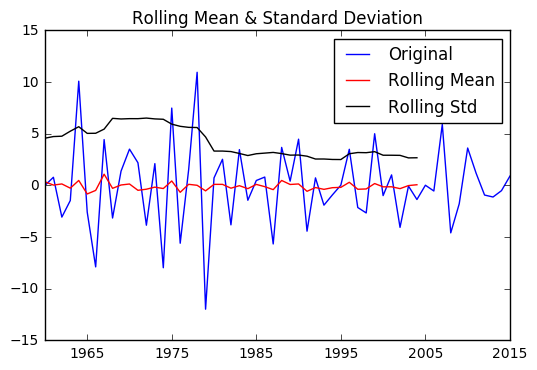

Results of Dickey-Fuller Test:
Test Statistic                 -4.443647
p-value                         0.000248
#Lags Used                      9.000000
Number of Observations Used    46.000000
Critical Value (10%)           -2.601541
Critical Value (5%)            -2.926785
Critical Value (1%)            -3.581258
dtype: float64


In [26]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [27]:
def expWeightedavg(ts1_log):
    expwighted_avg = pd.ewma(ts1_log, halflife=57)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,ignore_na=False,min_periods=0,halflife=57).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


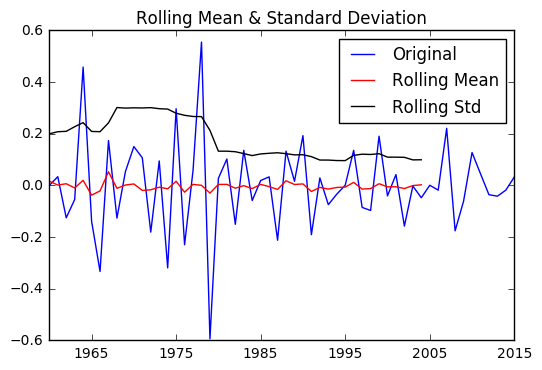

Results of Dickey-Fuller Test:
Test Statistic                -6.330380e+00
p-value                        2.916233e-08
#Lags Used                     6.000000e+00
Number of Observations Used    4.900000e+01
Critical Value (10%)          -2.599336e+00
Critical Value (5%)           -2.922629e+00
Critical Value (1%)           -3.571472e+00
dtype: float64


In [28]:
ts_log_ewma_diff = expWeightedavg(ts1_log)
test_stationarity(ts_log_ewma_diff.Value)

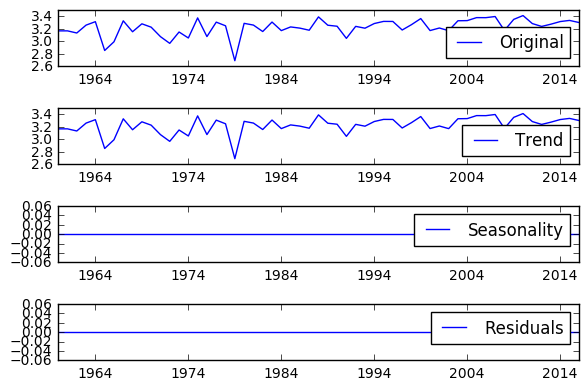

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [30]:
lag_acf = acf(ts1_log, nlags=10)
lag_pacf = pacf(ts1_log, nlags=10, method='ols')

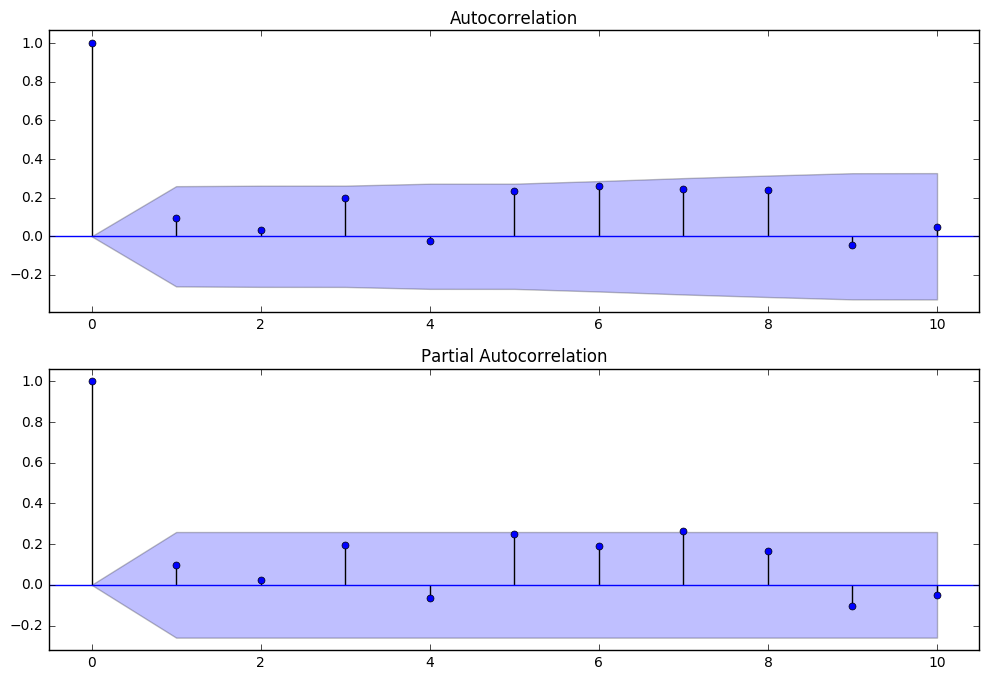

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

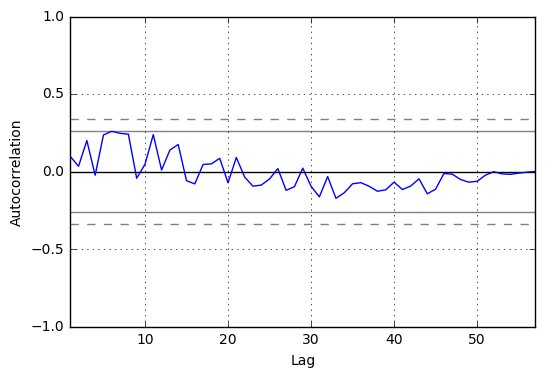

In [32]:
autocorrelation_plot(ts1_log)
plt.show()

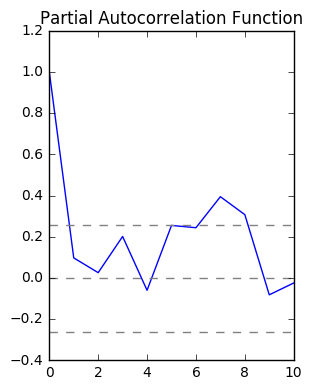

In [33]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [34]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [35]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [56]:
def AR_Model(ts):
    model = ARIMA(ts, order=(8, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 8
Coefficients: const          3.224023
ar.L1.Value   -0.094505
ar.L2.Value   -0.133449
ar.L3.Value    0.145520
ar.L4.Value   -0.081008
ar.L5.Value    0.164300
ar.L6.Value    0.220995
ar.L7.Value    0.355049
ar.L8.Value    0.244039
dtype: float64
2006-01-01    26.301812
Freq: -1AS-JAN, dtype: float64
-66.59024694593626


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


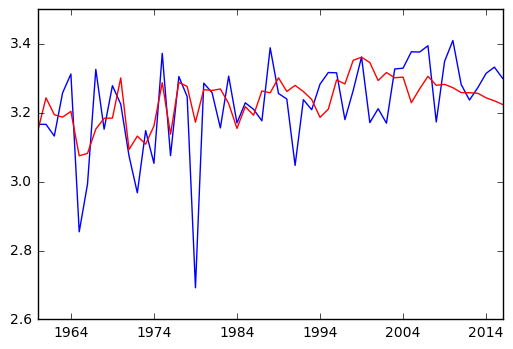

In [57]:
model_AR = AR_Model(ts1_log)

In [58]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 2))
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 5))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const          3.223268
ma.L1.Value    0.099050
ma.L2.Value   -0.007783
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(0, 2)   Log Likelihood                  34.544
Method:                       css-mle   S.D. of innovations              0.132
Date:                Sat, 19 Aug 2017   AIC                            -61.089
Time:                        04:54:46   BIC                            -52.917
Sample:                    01-01-2016   HQIC                           -57.913
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           3.2233      0.019    169.177      0.000         3.186     3.261
ma.L1.Value     0.09

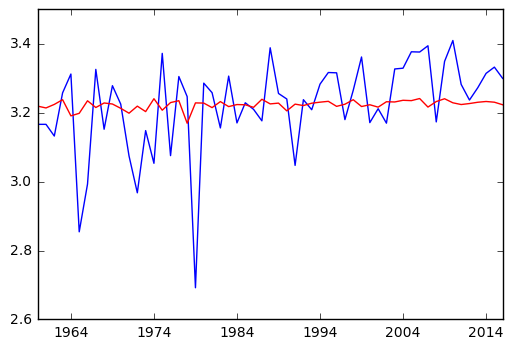

In [59]:
model_MA = MA_Model(ts1_log)

In [62]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(2, 0, 0))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(1,0, 5))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 2
Coefficients: const          3.223325
ar.L1.Value    0.094166
ar.L2.Value    0.025166
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(2, 0)   Log Likelihood                  34.567
Method:                       css-mle   S.D. of innovations              0.132
Date:                Sat, 19 Aug 2017   AIC                            -61.134
Time:                        04:55:01   BIC                            -52.962
Sample:                    01-01-2016   HQIC                           -57.958
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           3.2233      0.020    162.903      0.000         3.185     3.262
ar.L1.Value     0.09

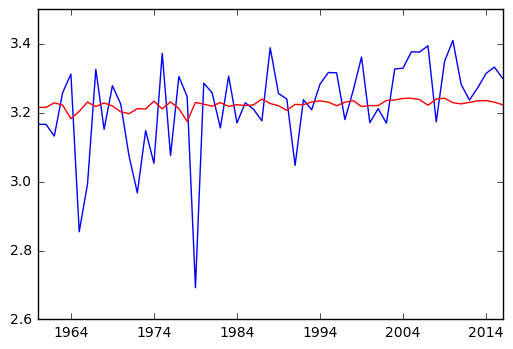

In [63]:
model_Combined = Combined_Model(ts1_log)

In [64]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(2, 0, 0))


In [65]:
aic_metric

,AIC,Modelname
0,-61.134060,"ARIMA(ts, order=(2, 0, 0))"
0,-63.097486,"ARIMA(ts, order=(2, 0, 0))"
0,-61.376457,"ARIMA(ts, order=(2, 0, 0))"
0,-59.576224,"ARIMA(ts, order=(2, 0, 0))"
0,-61.068151,"ARIMA(ts, order=(2, 0, 0))"
0,-63.306955,"ARIMA(ts, order=(2, 0, 0))"
0,-65.165914,"ARIMA(ts, order=(2, 0, 0))"
0,-66.590247,"ARIMA(ts, order=(2, 0, 0))"
0,-65.165914,"ARIMA(ts, order=(2, 0, 0))"
0,-65.165914,"ARIMA(ts, order=(2, 0, 0))"


In [66]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    #output.tolist()
    output = np.exp(output)
    output = output-20
    #out=normal(output)
    return output

In [67]:
forecast(model_AR,15)

array([ 2.1265918 ,  1.76404614,  4.15577653,  5.45741047,  3.83204479,
        3.49482684,  3.4834854 ,  2.94595096,  3.27700504,  4.14391651,
        4.59373097,  4.19103939,  3.66904884,  3.61173631,  3.61354545])

In [68]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    #PredictedVal=normal(fittedVal)
    #PredictedVal= fittedVal.tolist()
    fittedVal = np.exp(fittedVal)
    fittedVal = fittedVal-20
    print('Predicted existing values are:')
    return fittedVal
FittedValues(model_AR)

Predicted existing values are:


Year
2016-01-01    5.129008
2015-01-01    5.399157
2014-01-01    5.620739
2013-01-01    5.961082
2012-01-01    6.001364
2011-01-01    6.013054
2010-01-01    6.385000
2009-01-01    6.643730
2008-01-01    6.571889
2007-01-01    7.272767
2006-01-01    6.301812
2005-01-01    5.262060
2004-01-01    7.211361
2003-01-01    7.154805
2002-01-01    7.571201
2001-01-01    6.940747
2000-01-01    8.386364
1999-01-01    8.824629
1998-01-01    8.570807
1997-01-01    6.675429
1996-01-01    6.988239
1995-01-01    4.794107
1994-01-01    4.209212
1993-01-01    5.497087
1992-01-01    6.092520
1991-01-01    6.562039
1990-01-01    6.099330
1989-01-01    7.154449
1988-01-01    5.997210
1987-01-01    6.138724
1986-01-01    4.360733
1985-01-01    4.974707
1984-01-01    3.444288
1983-01-01    5.200440
1982-01-01    6.288020
1981-01-01    6.173881
1980-01-01    6.238944
1979-01-01    3.872619
1978-01-01    6.485123
1977-01-01    6.798800
1976-01-01    3.050251
1975-01-01    6.772436
1974-01-01    3.608955
1973-0

In [71]:
def normal(predictions_ARIMA_diff):
    #predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = np.cumsum(np.concatenate((ts1.values[0], predictions_ARIMA_diff)))
    print('normalized')
    #predictions_ARIMA_diff_cumsum=np.absolute(predictions_ARIMA_diff_cumsum)
    return predictions_ARIMA_diff_cumsum